# Novelis Code Assessment

Novelis Data Science team is building a data science platform which provides framework for end-to-end implementation of machine learning pipelines. The framework will be built using python in an object oriented programming style. Furthermore, we want to implement everything using the scikit learn API, all implementations confined to fit, transform, and predict methods. This will allow us to implement machine learning pipelines using the scikit learn pipelines. As such, the assessment will evaluate candidates’ ability to transform codebase prepared in procedural programming to object oriented programming, specifically using the scikit learn API as much as possible.

The following two cells contain a procedural implementation of feature engineering. In the subsequent cells it is your task to refactor the procedural implementation into an object oriented framework

More information about the scikit learn API can be found:

- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://scikit-learn.org/dev/developers/contributing.html#rolling-your-own-estimator
- http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

*If we are not able to run or replicate your code/steps, we will not grade your assessment.*

In [63]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns

df = pd.read_csv('fraud_final_dataset.csv')

In [64]:
df.head()

,user_id,signup_time,purchase_time,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


## EDA
A big portion of being a data scientist is his or her ability to understand the data. Please feel free to use the bottom cells to perform exploratory data analysis. Once you're done, please move on to the problems and tasks.

In [65]:
df.shape

(120000, 13)

We have 120,000 rows of datapoints which is more than enough for a machine learning model to be almost accurate.

In [66]:
df.describe()

,user_id,elapsed_time,purchase_value,age,ip_address,class
count,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000
mean,200320.280100,1.860408,36.881475,33.125250,2.151550e+09,0.093875
std,115361.945935,1.250767,18.325855,8.617081,1.248314e+09,0.291656
min,2.000000,0.000000,9.000000,18.000000,9.344714e+04,0.000000
25%,100925.500000,1.000000,22.000000,27.000000,1.085345e+09,0.000000
50%,200037.500000,2.000000,34.000000,33.000000,2.155238e+09,0.000000
75%,300395.500000,3.000000,49.000000,39.000000,3.241268e+09,0.000000
max,400000.000000,4.000000,154.000000,76.000000,4.294850e+09,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120000 non-null  int64  
 1   signup_time     120000 non-null  object 
 2   purchase_time   120000 non-null  object 
 3   elapsed_time    120000 non-null  int64  
 4   purchase_value  120000 non-null  int64  
 5   device_id       120000 non-null  object 
 6   source          120000 non-null  object 
 7   browser         120000 non-null  object 
 8   sex             120000 non-null  object 
 9   age             120000 non-null  int64  
 10  ip_address      120000 non-null  float64
 11  class           120000 non-null  int64  
 12  country         120000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 11.9+ MB


Plotting scatter plots of all numerical features in the data

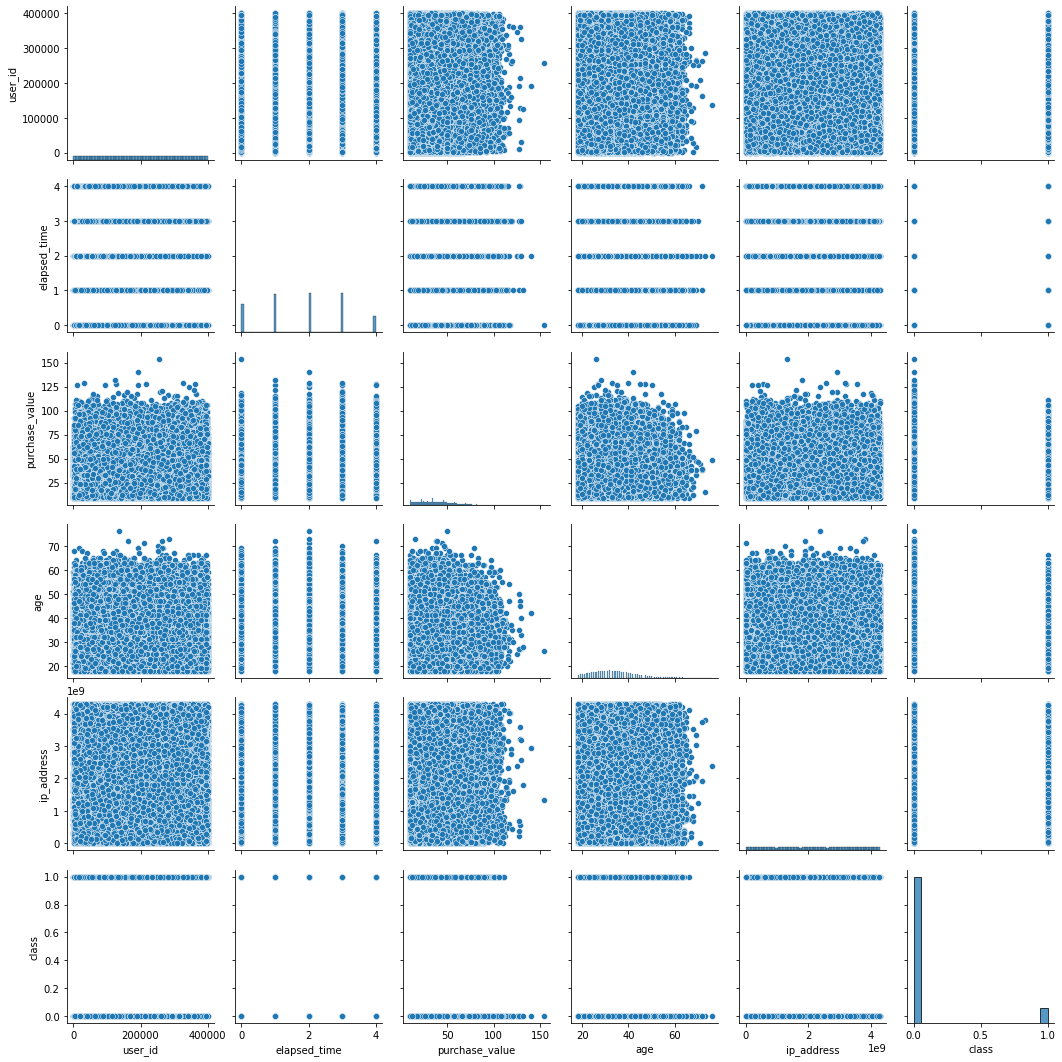

In [68]:
sns.pairplot(df)

Since our target variable is a binary classifier, this plot is not providing much insights. Let's plot the target variables with the other independent categorical variables.

Text(0.5, 1.0, 'Source vs Percentage of transaction (fraud or not)')

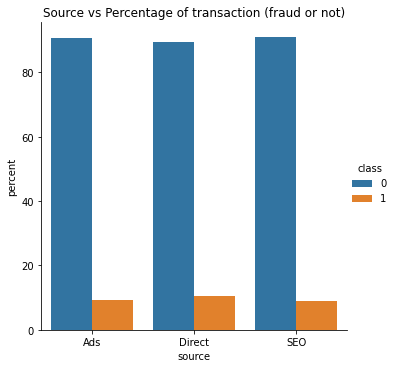

In [69]:
df1 = df.groupby(["source", "class"]).size().reset_index(name='count')
df2 = df.groupby('source')["class"].count().reset_index(name='Total_count')
df_final = df1.merge(df2)
df_final['percent'] = 100*(df_final['count']/df_final['Total_count'])


sns.catplot(x='source', y='percent', hue='class', kind='bar', data=df_final)
plt.title('Source vs Percentage of transaction (fraud or not)')

From the above graph, we can see that the percentage of fraud transactions and normal transactions are almost equal for all three sources - "Ads", "Direct" and "SEO".

Text(0.5, 1.0, 'Elapsed time vs Percentage of transaction (fraud or not)')

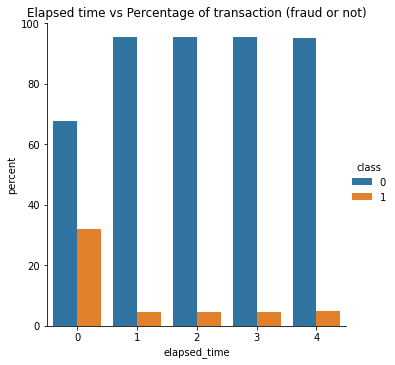

In [70]:
df1 = df.groupby(["elapsed_time", "class"]).size().reset_index(name='count')
df2 = df.groupby('elapsed_time')["class"].count().reset_index(name='Total_count')
df_final = df1.merge(df2)
df_final['percent'] = 100*(df_final['count']/df_final['Total_count'])


sns.catplot(x='elapsed_time', y='percent', hue='class', kind='bar', data=df_final)
plt.title('Elapsed time vs Percentage of transaction (fraud or not)')

We can see something fishy here. The transaction is likely to be fraud, if the elapsed time is "0" than other timings.

Text(0.5, 1.0, 'Sex vs Percentage of transaction (fraud or not)')

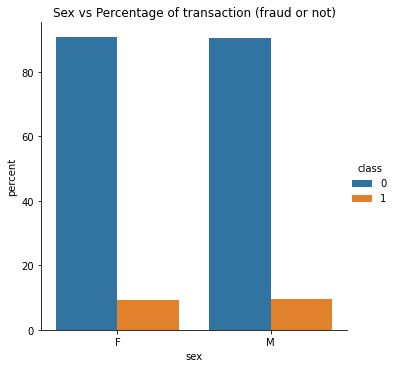

In [71]:
df1 = df.groupby(["sex", "class"]).size().reset_index(name='count')
df2 = df.groupby('sex')["class"].count().reset_index(name='Total_count')
df_final = df1.merge(df2)
df_final['percent'] = 100*(df_final['count']/df_final['Total_count'])


sns.catplot(x='sex', y='percent', hue='class', kind='bar', data=df_final)
plt.title('Sex vs Percentage of transaction (fraud or not)')

From the above graph, we can see that the percentage of fraud transactions and normal transactions are almost equal for both sex.

Text(0.5, 1.0, 'Browser vs Percentage of transaction (fraud or not)')

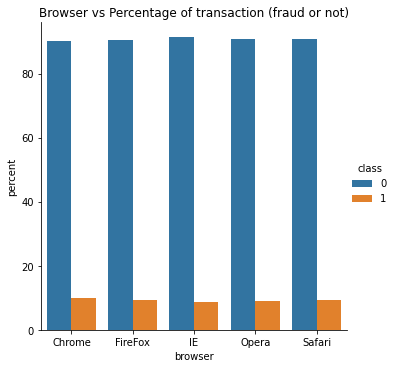

In [72]:
df1 = df.groupby(["browser", "class"]).size().reset_index(name='count')
df2 = df.groupby('browser')["class"].count().reset_index(name='Total_count')
df_final = df1.merge(df2)
df_final['percent'] = 100*(df_final['count']/df_final['Total_count'])


sns.catplot(x='browser', y='percent', hue='class', kind='bar', data=df_final)
plt.title('Browser vs Percentage of transaction (fraud or not)')

Browser also doesn't have any impact with the type of transaction.

Let's check whether it is to do something with the country (like most of the fraudulent transactions are from a specific country or not)

In [73]:
df1 = df.groupby(["country", "class"]).size().reset_index(name='count')
df2 = df.groupby('country')["class"].count().reset_index(name='Total_count')
df_final = df1.merge(df2)
df_final['percent'] = 100*(df_final['count']/df_final['Total_count'])
df_final[df_final['class'] == 1].sort_values(by='percent', ascending=False)

,country,class,count,Total_count,percent
257,Turkmenistan,1,1,1,100.000000
279,Virgin Islands (U.S.),1,1,2,50.000000
178,Namibia,1,8,20,40.000000
151,Luxembourg,1,22,56,39.285714
238,Sri Lanka,1,8,22,36.363636
...,...,...,...,...,...
24,Belarus,1,2,59,3.389831
65,Cyprus,1,1,31,3.225806
174,Morocco,1,3,134,2.238806
224,Serbia,1,1,50,2.000000


In the above table, "precent" indicates the percentage of fraud transactions that are from that specific country. We can't find any pattern here too.

## Feature Engineering

The steps we take below are, by no means, fully comprehensive nor production-level. However, we will assume that those steps below are **sufficient** for data processing and feature engineering in this assessment. 

### Problem 0 (provided - do NOT modify)
#### Write a custom transformer called CategoricalTransformer to encode categorical columns in an optional "columns" construction parameter.

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = preprocessing.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = preprocessing.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 1
#### Write a custom transformer called DropColTransformer to drop the columns specified in an optional "columns" construction parameter.

In [75]:
class DropColTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self,columns = None):
      self.columns = columns # array of column names to drop

    def fit(self,X,y=None):
      return self
    
    def transform(self, X):
      '''
        Deletes columns of X specified in self.columns using
        drop function in pandas. If no columns specified, it won't delete any columns
        '''
      output = X.copy()
      if self.columns is not None:
        output.drop(self.columns,axis=1,inplace=True)
      else:
        pass
      return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 2
#### Write a custom transformer called FillMissingTransformer that fills in the missing values in the dataset that takes an optional "value" parameter that specifies what value to substitute for missing values.

In [76]:
class FillMissingTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self,columns = None, value = None):
      self.columns = columns # array of column names to fill na
      self.value = value 

    def fit(self,X,y=None):
      return self
    
    def transform(self, X):
      '''
        Fill Missing values with the value provided
        '''
      output = X.copy()
      if self.columns is not None:
        for col in self.columns:
                output[col] = output[col].fillna(self.value)
      else:
        pass
      return output
      
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 3
#### Write a custom transformer called DateTransformer to cast date features into pandas datetime format that takes an optional construction parameter "columns" to specify which columns need to be transformed, and an optional parameter "strftime" that specifies the format to be parsed.

In [77]:
class DateTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self,columns = None, strftime = None):
      self.columns = columns
      self.strftime = strftime 

    def fit(self,X,y=None):
      return self
    
    def transform(self, X):
      '''
        Convert the type of the provided columns to datetime with the 
        provided format
        '''
      output = X.copy()
      if self.columns is not None:
        for col in self.columns:
                output[col] = pd.to_datetime(output[col], format = self.strftime)
      else:
        pass
      return output
      
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 4 
#### Write a custom transformer called NumericalTransformer to: <br> 1) calculate the latency (i.e. time taken by the user in completing a transaction after registration)  <br> 2) calculate the number of users who are using the same device. 
The construction method need not contain an optional parameter.

In [78]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
      self 

    def fit(self,X,y=None):
      return self
    
    def transform(self, X):
      '''
        1) calculate the latency (i.e. time taken by the user in completing a transaction after registration)
        2) calculate the number of users who are using the same device.
        '''
      output = X.copy()
      output['latency'] = (output['purchase_time'] - output['signup_time']).dt.days
      output1 = output.groupby(['device_id']).size().reset_index(name='num_of_users')
      output = pd.merge(output, output1, on='device_id')
      return output
      
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 5 (provided - do NOT modify)
#### Create a Pipeline Object that concatonates all of the custom transformers that you have just created

In [79]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
                        ('missing', FillMissingTransformer()),
                        ('dates', DateTransformer(['signup_time', 'purchase_time'])),
                        ('numerical', NumericalTransformer()),
                        ('categorical', CategoricalTransformer(['country', 'sex', 
                                                          'browser', 'source','device_id'])),
                        ('dropCat', DropColTransformer(['signup_time', 'purchase_time']))])

In [80]:
transformed_data = full_pipeline.fit_transform(df)

In [81]:
X = transformed_data.drop(['class'], axis = 1)
y = transformed_data['class']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Modeling

Assuming this pipeline is sufficient for data processing and feature engineering, explore **how ever many** different model types and choose one model in which you'd like to move forward. Please explain why you would move forward with the best model.

**Preferably only use models from sklearn. If there is an absolute need to incorporate models from other packages, please specify which version of the package was used and explain why that package was needed.**

*Feel free to add/remove cells if needed*

### Problem 6: Build model 1

### Logistic Regression:

#### Necessary steps to build the model

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#### Performance metrics of interest & Validation results

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27210     0]
 [ 2790     0]]


In [85]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27210
           1       0.00      0.00      0.00      2790

    accuracy                           0.91     30000
   macro avg       0.45      0.50      0.48     30000
weighted avg       0.82      0.91      0.86     30000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Though Logistic regression would be the basic model for Binary Classification, the results we obtained are good enough.

Since, this is a fraud detection problem and the dataset is imbalanced, evaluating performance of the model using "accuarcy" won't be helpful.

We can look at "Recall" and "Precision" to evaluate metric of the model. Since, "F1 score" utilizes both recall and precision into account, let's use it as a primary evaluation metric here.

### Problem 7: Build model 2

### K Nearest Neighbors:

#### Necessary steps to build the model

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [87]:
y_pred = classifier.predict(X_test)

#### Performance metrics of interest & Validation results

In [88]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26696   514]
 [ 1978   812]]


In [89]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     27210
           1       0.61      0.29      0.39      2790

    accuracy                           0.92     30000
   macro avg       0.77      0.64      0.67     30000
weighted avg       0.90      0.92      0.90     30000



To find the best k-value, let's loop through k-values from 1 to 40.

In [90]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

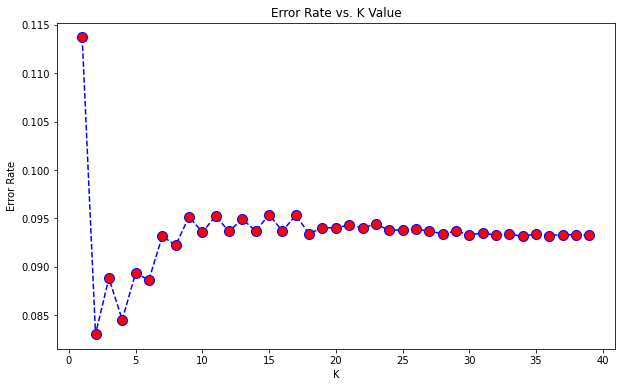

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that k=2 has the minimum error rate. Coincidentally, we have built out model using k=2.

### Problem 8: Build model 3

### Random Forest Classifier:

#### Necessary steps to build the model

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [93]:
y_pred = classifier.predict(X_test)

#### Performance metrics of interest & Validation results

In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27188    22]
 [ 1310  1480]]


In [95]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27210
           1       0.99      0.53      0.69      2790

    accuracy                           0.96     30000
   macro avg       0.97      0.76      0.83     30000
weighted avg       0.96      0.96      0.95     30000



### Hyper-parameter tuning of Random Forest Classifier using GridSearchCV:

In [96]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300]
max_depth = [5, 8]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [97]:
bestF.best_params_

{'max_depth': 5, 'n_estimators': 300}

### Building the Random Forest Classifier using the best parameters obtained using Hyperparameter tuning:

In [106]:
classifier = RandomForestClassifier(n_estimators = 300, max_depth = 5, criterion = 'entropy', random_state = 0)

In [107]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,
                       random_state=0)

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27210     0]
 [ 1327  1463]]


In [110]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27210
           1       1.00      0.52      0.69      2790

    accuracy                           0.96     30000
   macro avg       0.98      0.76      0.83     30000
weighted avg       0.96      0.96      0.95     30000



### Problem 9: Explain why you chose your model to move forward

In [111]:
print("""
RANDOM FOREST CLASSIFIER is the best model here.

As the dataset is imbalanced, ie, there are more 0s in target variable than 1s, "accuracy" won't be the ideal metric to consider.

We can look at "Recall" and "Precision" to evaluate metric of the model. Since, "F1 score" utilizes both recall and precision into account, 
let's use it as a primary evaluation metric here.

According to F1 scores comparison, Random Forest performs better than others.

Some other advantages of choosing Random Forest Classifier are:
1. It can handle imbalanced data well.
2. It uses bagging method, so the output won't be biased.
3. It is robust to outliers.
""")


RANDOM FOREST CLASSIFIER is the best model here.

As the dataset is imbalanced, ie, there are more 0s in target variable than 1s, "accuracy" won't be the ideal metric to consider.

We can look at "Recall" and "Precision" to evaluate metric of the model. Since, "F1 score" utilizes both recall and precision into account, 
let's use it as a primary evaluation metric here.

According to F1 scores comparison, Random Forest performs better than others.

Some other advantages of choosing Random Forest Classifier are:
1. It can handle imbalanced data well.
2. It uses bagging method, so the output won't be biased.
3. It is robust to outliers.



### Problem 10: Next Steps
Open-ended Question: What would you do to improve this model in data processing steps, feature engineering steps, and/or modeling stage? 

In [112]:
print("""
There is a room for lot of improvements in this project.

Some include:
-> Instead of deleting the datetime type columns, we can extract "month", "weekday", "hour of the day" from those columns.
-> For some categorical variables, instead of doing Label encoding, we can do OneHotEncoding, 
so that it won't assign a weightage for each category
-> Since "id" columns are just unique identifier, it won't have an effect on the Machine learning model. We can drop those variables.
-> Standardize the data, so that it won't be biased.
-> Apply Principal Component Analysis to extract the most important features.
-> Hyperparameter tuning of Random Forest Classisfier with different combinations of parameters.
-> Use Neural Networks to train the data.
""")


There is a room for lot of improvements in this project.

Some include:
-> Instead of deleting the datetime type columns, we can extract "month", "weekday", "hour of the day" from those columns.
-> For some categorical variables, instead of doing Label encoding, we can do OneHotEncoding, 
so that it won't assign a weightage for each category
-> Since "id" columns are just unique identifier, it won't have an effect on the Machine learning model. We can drop those variables.
-> Standardize the data, so that it won't be biased.
-> Apply Principal Component Analysis to extract the most important features.
-> Hyperparameter tuning of Random Forest Classisfier with different combinations of parameters.
-> Use Neural Networks to train the data.



## I have implemented all these improvements and submitted one more Python notebook along with this one. I would appreciate it if you can have a look at it.